[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/DL/blob/main/shallow_NN.ipynb)


-----------

**Disciplina:** Introdução ao Aprendizado Profundo

**Professor:** Diogo Ferreira de Lima Silva

-----------


In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [27]:
class ShallowNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        hidden_output = self.hidden(x)
        relu_output = self.relu(hidden_output)
        output = self.output(relu_output)
        return output, hidden_output, relu_output



In [28]:
input_size = 1   
hidden_size = 3  
output_size = 1  


In [29]:
# Define a simple input tensor (e.g., x values from 0 to 2)
x = torch.linspace(-2, 2, steps=100).view(-1, 1)

In [30]:
model = ShallowNN(input_size, hidden_size, output_size)

output, hidden_output, relu_output = model(x)

print(f'Pesos das unidades da camada escondida:\n     {model.hidden.weight.data}\n')
print(f'Bias das unidades da camada escondida:\n      {model.hidden.bias.data}\n')
print(f'pesos das unidades da camada de output:\n     {model.output.weight.data}\n')
print(f'bias das unidades da camada de output:\n      {model.output.bias.data}')

Pesos das unidades da camada escondida:
     tensor([[-0.5549],
        [ 0.8324],
        [-0.1135]])

Bias das unidades da camada escondida:
      tensor([0.0090, 0.3871, 0.4771])

pesos das unidades da camada de output:
     tensor([[ 0.1252, -0.1321, -0.0386]])

bias das unidades da camada de output:
      tensor([0.4257])


In [31]:
print(f'{hidden_output[:5]}\n')
print(f'{relu_output[:5]}\n')
print(f'{output[:5]}\n')

tensor([[ 1.1187, -1.2776,  0.7042],
        [ 1.0963, -1.2440,  0.6996],
        [ 1.0739, -1.2104,  0.6950],
        [ 1.0515, -1.1767,  0.6904],
        [ 1.0291, -1.1431,  0.6858]], grad_fn=<SliceBackward0>)

tensor([[1.1187, 0.0000, 0.7042],
        [1.0963, 0.0000, 0.6996],
        [1.0739, 0.0000, 0.6950],
        [1.0515, 0.0000, 0.6904],
        [1.0291, 0.0000, 0.6858]], grad_fn=<SliceBackward0>)

tensor([[0.5386],
        [0.5360],
        [0.5333],
        [0.5307],
        [0.5281]], grad_fn=<SliceBackward0>)



In [32]:
# Convertendo para arrays para plotar
x_np = x.detach().numpy()
output_np = output.detach().numpy()
hidden_output_np = hidden_output.detach().numpy()
relu_output_np = relu_output.detach().numpy()

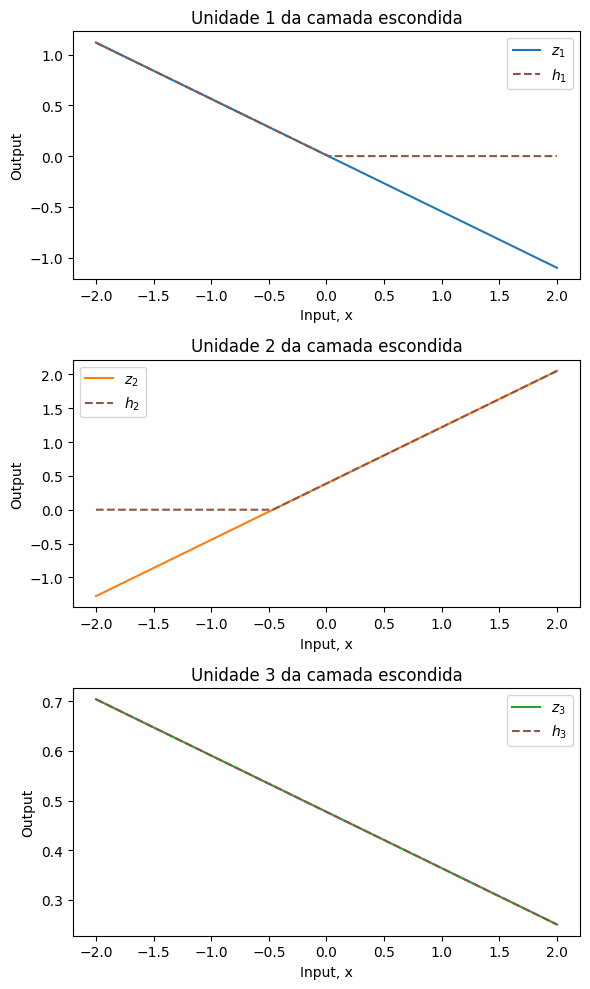

In [45]:
fig, axs = plt.subplots(3, figsize=(6, 10))

# Plot pré-ativação
for i in range(hidden_size):
    axs[i].plot(x, hidden_output_np[:, i], label=f'$z_{i+1}$', color=f'C{i}')
    axs[i].set_title(f'Unidade {i+1} da camada escondida')
    axs[i].set_xlabel('Input, x')
    axs[i].set_ylabel('Output')
    axs[i].legend()

# Plot saída da ativação

for i in range(hidden_size):
    axs[i].plot(x_np, relu_output_np[:, i], label=f'$h_{i+1}$', linestyle='--', color=f'C{5}')
    axs[i].legend()
    

plt.tight_layout()
plt.show()


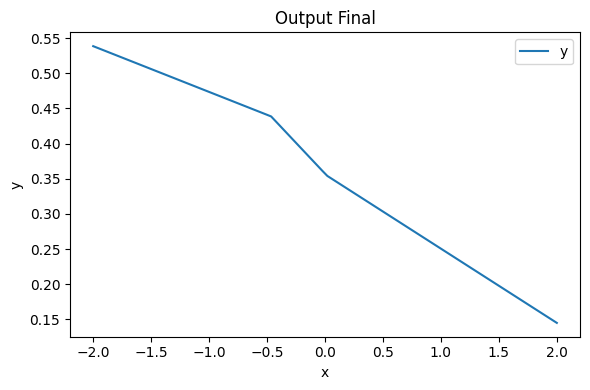

In [46]:
# Plot the final network output
plt.figure(figsize=(6, 4))
plt.plot(x_np, output_np, label='y')
plt.title('Output Final')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


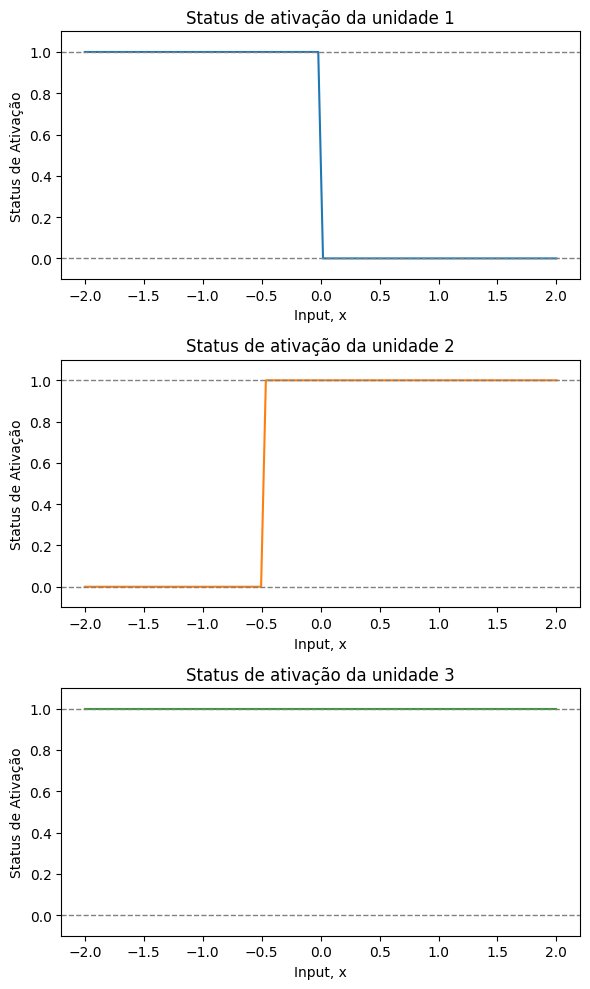

In [47]:
activated_units = relu_output_np > 0


fig, axs = plt.subplots(hidden_size, figsize=(6, 10))

for i in range(hidden_size):
    axs[i].plot(x_np, activated_units[:, i],  color=f'C{i}')
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)  
    axs[i].axhline(1, color='gray', linestyle='--', linewidth=1)  
    axs[i].set_title(f'Status de ativação da unidade {i+1}')
    axs[i].set_xlabel('Input, x')
    axs[i].set_ylabel('Status de Ativação')
    axs[i].set_ylim(-0.1, 1.1) 

plt.tight_layout()
plt.show()